# Project Roadmap: Heart Disease Prediction (UCI Dataset)

To better understand the full lifecycle of a machine learning project, we will follow these stages:

---

## 1. Exploratory Data Analysis (EDA)
- Understand the dataset structure.  
- Explore target variable (`num`).  
- Summarize categorical and numerical features.  
- Detect missing values and data types.  

---

## 2. Data Preparation
- Remove unnecessary columns (e.g., `id`).  
- Convert target variable into **Binary Classification** (`0` = No disease, `1` = Disease).  
- Handle missing values (imputation with mean/median/mode).  
- Encode categorical features (`sex`, `cp`, `restecg`, `slope`, `thal`, `origin`).  
- Scale numerical features (`age`, `trestbps`, `chol`, `thalach`, `oldpeak`, `ca`).  

---

## 3. Data Cleansing
- Detect and handle outliers in numerical columns.  
- Ensure categorical features contain valid and consistent values.  
- Remove duplicate records if any.  

---

## 4. Feature Engineering & Selection
- Apply **One-Hot Encoding** or **Label Encoding** for categorical features.  
- Use **Correlation Analysis** to find relationships between features.  
- Select the most important features for modeling (e.g., using `SelectKBest`, feature importance from tree models).  

---

## 5. Model Training
- Split dataset into **Training (80%)** and **Testing (20%)**.  
- Train multiple models:  
  - Logistic Regression  
  - Decision Tree / Random Forest  
  - Support Vector Machine (SVM)  
  - Gradient Boosting (XGBoost/LightGBM)  
  - Neural Network (optional, advanced)  

---

## 6. Model Evaluation
- Evaluate performance using:  
  - Accuracy  
  - Precision, Recall, F1-score  
  - ROC Curve & AUC  
  - Confusion Matrix  

- Compare models and select the best-performing one.  

---

## 7. Model Deployment
- Save the trained model (`pickle` or `joblib`).  
- Create a simple prediction pipeline for new patients.  
- Optional: Deploy using **Flask / FastAPI** or integrate into a dashboard (Streamlit).  

---

## 8. Insights & Conclusion
- Summarize findings.  
- Highlight which features are most predictive of heart disease.  
- Discuss limitations and possible improvements.  

---


# Heart Disease Prediction Project (UCI Dataset)

In this project, we will treat the **Heart Disease UCI Dataset** as a real-world problem and apply all stages:  
**Data Preparation → Data Cleansing → Feature Extraction/Selection → Model Training → Evaluation → Deployment**

---

## Step 1: Exploratory Data Analysis (EDA)

### General Description
- **Dataset Name:** Heart Disease UCI Dataset  
- **Source:** Kaggle + UCI Repository  
- **Task:** Classification → Predict whether a patient has heart disease (`num`)  

---

### Target Variable
- **num (the predicted attribute):**
  - `0` → No heart disease  
  - `1, 2, 3, 4` → Different levels    eart disease  

👉 In most research, this is converted into **Binary Classification**:  
- `0` = No disease  
- `1` = Presence of disease (any value from 1–4)  

---

### Features (Independent Variables)

- **id** (Unique Identifier) → Unique ID for each patient (**Not used in training**)  
- **age** (Numeric) → Age of the patient in years  
- **origin** (Categorical) → Place of study (Budapest, Zurich, Basel, Long Beach, Cleveland)  
- **sex** (Categorical: `Male/Female`) → Gender  

- **cp** (Categorical: chest pain type):  
  - Typical angina  
  - Atypical angina  
  - Non-anginal pain  
  - Asymptomatic  

- **trestbps** (Numeric) → Resting blood pressure (mm Hg)  
- **chol** (Numeric) → Serum cholesterol (mg/dl)  
- **fbs** (Categorical: `True/False`) → Fasting blood sugar > 120 mg/dl  

- **restecg** (Categorical: resting electrocardiographic results):  
  - Normal  
  - ST-T wave abnormality  
  - Left ventricular hypertrophy  

- **thalach** (Numeric) → Maximum heart rate achieved  
- **exang** (Categorical: `True/False`) → Exercise induced angina  
- **oldpeak** (Numeric) → ST depression induced by exercise relative to rest  

- **slope** (Categorical: slope of the peak exercise ST segment):  
  - Upsloping  
  - Flat  
  - Downsloping  

- **ca** (Numeric/Ordinal) → Number of major vessels (0–3) colored by fluoroscopy  
- **thal** (Categorical):  
  - Normal  
  - Fixed defect  
  - Reversible defect  

---

### Initial Notes about the Dataset
- **Number of records:** ~303 rows  
- Contains some missing values (especially in `ca` and `thal`)  
- Mix of **Numeric** and **Categorical** variables  
- **Final Goal:** Predict the value of `num` (binary or multiclass)  

---les  
- **Final Goal:** Predict the value of `target`  

---
+ Categorical  
- **الهدف النهائي:** Predict `target`  

---


## 2: Data Preparation

### ===============================
### 2.1 Import Libraries
### ===============================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### ===============================
#### 2.2 Load Data
#### ===============================

In [2]:
df = pd.read_csv("C:/Users/dwdwa/Downloads/heart_disease_uci.csv")

In [3]:

print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [4]:
df.shape

(920, 16)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [6]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [7]:
# Drop useless columns
df.drop(['id', 'dataset'], axis=1, inplace=True)

# Convert target (num: 0 = No Disease, 1–4 = Disease)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)

In [8]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64


#### ===============================
#### 3. Handle Missing Values
#### ===============================
#### Separate numeric and categorical columns BEFORE encoding

In [9]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object','category']).columns

print("Numeric columns:", num_cols.tolist())
print("Categorical columns:", cat_cols.tolist())

Numeric columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


##### Impute numeric

In [10]:
imputer_num = SimpleImputer(strategy='mean')

df[num_cols] = imputer_num.fit_transform(df[num_cols])

##### Impute categorical

In [11]:
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [12]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,67.0,Male,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,1.0
2,67.0,Male,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,37.0,Male,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,41.0,Female,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,Female,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1.0
916,62.0,Male,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0.0
917,55.0,Male,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,1.0
918,58.0,Male,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0.0


#### ===============================
#### 4. Encode Categorical Columns
#### ===============================

In [14]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df_encoded.head())


    age  trestbps   chol  thalch  oldpeak   ca  target  sex_Male  \
0  63.0     145.0  233.0   150.0      2.3  0.0     0.0      True   
1  67.0     160.0  286.0   108.0      1.5  3.0     1.0      True   
2  67.0     120.0  229.0   129.0      2.6  2.0     1.0      True   
3  37.0     130.0  250.0   187.0      3.5  0.0     0.0      True   
4  41.0     130.0  204.0   172.0      1.4  0.0     0.0     False   

   cp_atypical angina  cp_non-anginal  cp_typical angina  fbs_True  \
0               False           False               True      True   
1               False           False              False     False   
2               False           False              False     False   
3               False            True              False     False   
4                True           False              False     False   

   restecg_normal  restecg_st-t abnormality  exang_True  slope_flat  \
0           False                     False       False       False   
1           False           

#### ===============================
#### 5. Data Visualization Example
#### ===============================

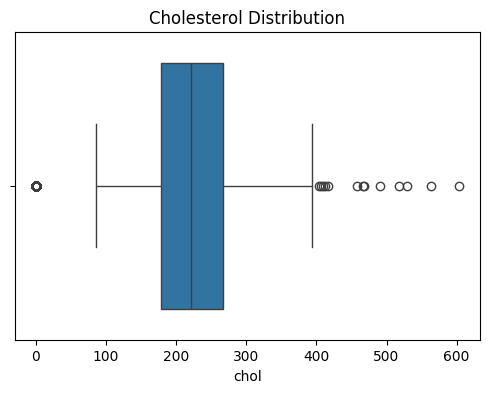

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['chol'])
plt.title("Cholesterol Distribution")
plt.show()


##### ===============================
##### 6. Feature Scaling
##### ===============================

In [16]:
num_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

In [17]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63.0,Male,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0.0
1,67.0,Male,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,1.0
2,67.0,Male,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1.0
3,37.0,Male,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0.0
4,41.0,Female,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,Female,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1.0
916,62.0,Male,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0.0
917,55.0,Male,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,1.0
918,58.0,Male,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0.0


#### ===============================
#### 7. Train/Test Split
#### ===============================

In [18]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (736, 18)
Test shape: (184, 18)


#### ===============================
#### 8. Model Training
#### ===============================

In [19]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
print("DecisionTree Model training completed.")

DecisionTree Model training completed.


In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [21]:

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
print("forst training completed.")

forst training completed.


In [22]:
svc_model = SVC(class_weight='balanced', random_state=42)
svc_model.fit(X_train, y_train)
print("svc_model training completed.")

svc_model training completed.


### ===============================
### 9. Model Evaluation
### ===============================

In [23]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")



Accuracy: 0.8370


In [24]:
# Predictions
y_pred_dt = model1.predict(X_test)

# Accuracy
acc1 = accuracy_score(y_test, y_pred_dt)
print(f"DecisionTree Accuracy: {acc:.4f}")

DecisionTree Accuracy: 0.8370


In [25]:
y_pred_forest = forest.predict(X_test)
print("\n🔹 Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))


🔹 Random Forest Classifier
Accuracy: 0.8478260869565217
Confusion Matrix:
 [[64 18]
 [10 92]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        82
         1.0       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



In [26]:
# Predictions
y_pred_SVM = svc_model.predict(X_test)

# Accuracy
acc2 = accuracy_score(y_test, y_pred_SVM)
print(f"SVM Accuracy: {acc:.4f}")


SVM Accuracy: 0.8370


In [27]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81        82
         1.0       0.83      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



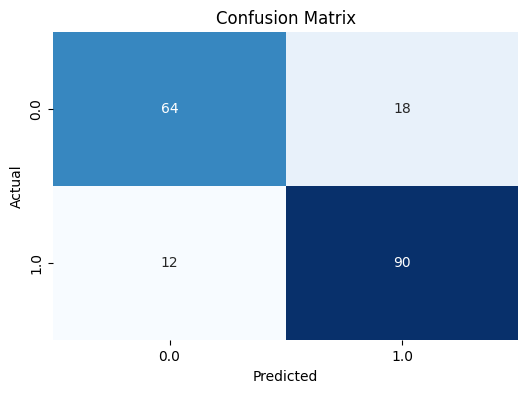

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

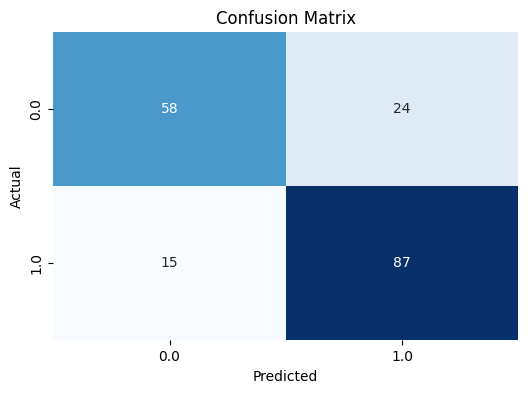

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

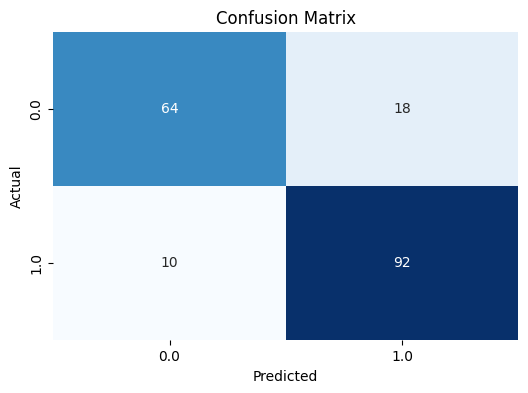

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

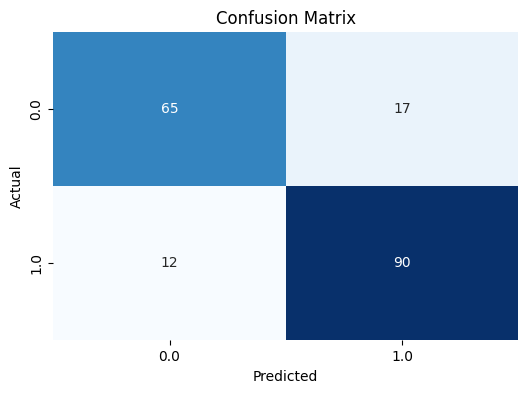

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_SVM)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()